# knn聚类算法-iris数据集测试

已标注的数据, 对应于有监督学习 => 分类

有别于k-means, 的无标注, 无监督 => 聚类

![预测](https://img-blog.csdnimg.cn/7d62643c0b7745789983f47fba5d20a9.png?x-oss-process=image/watermark,type_d3F5LXplbmhlaQ,shadow_50,text_Q1NETiBAVmVybm9uSnNu,size_20,color_FFFFFF,t_70,g_se,x_16)

训练集, 为已经明确标注好的数据, 具体是什么电影

测试集, 则根据训练集的模型来找到测试集中的数据和训练集中的那些数据最为近邻, 进而推测测试集中的电影的类型

knn
算法思路：
如果一个样本在特征空间中的k个最相似(即特征空间中最邻近)的样本中的大多数**属于某一个类别**(因为这些数据是已经标注的, 所以知道其所属)，则该样本也属于这个类别。
k近邻模型的三个基本要素：
1. k值的选择：k值的选择会对结果产生重大影响。较小的k值可以减少近似误差，但是会增加估计误差；较大的k值可以减小估计误差，但是会增加近似误差。一般而言，通常采用交叉验证法来选取最优的k值。
2. 距离度量：距离反映了特征空间中两个实例的相似程度。可以采用欧氏距离、曼哈顿距离等。
3. 分类决策规则：往往采用多数表决。

k-means
算法步骤：
1. 从n个数据中随机选择 k 个对象作为初始聚类中心；
2. 根据每个聚类对象的均值（中心对象），计算每个数据点与这些中心对象的距离；并根据最小距离准则，重新对数据进行划分；
3. 重新计算每个有变化的聚类簇的均值，选择与均值距离最小的数据作为中心对象；
4. 循环步骤2和3，直到每个聚类簇不再发生变化为止。

k-means方法的基本要素：

k值的选择：也就是类别的确定，与K近邻中k值的确定方法类似。
距离度量：可以采用欧氏距离、曼哈顿距离等.

简而言之, 二者最为关键点都和K值的确定有关

![knn](https://pic3.zhimg.com/80/v2-0d055ae38d48675e641022ce178398c3_720w.jpg?source=1940ef5c)

In [1]:
# 从sklearn中导出iris的数据集
from sklearn.datasets import load_iris

# cross_val_score(交叉验证评分), K折验证交叉验证
from sklearn.model_selection import cross_val_score

# knn近邻分类器
from sklearn.neighbors import KNeighborsClassifier

# 拆分数据集
from sklearn.model_selection import train_test_split as tts

import matplotlib.pyplot as plt

# 颜色
from matplotlib.colors import ListedColormap

import numpy as np

import pandas as pd


## 载入数据

In [2]:
# 加载iris数据, 包含花朵的一些基础参数, 如长宽
iris = load_iris()

x = iris.data

y = iris.target

In [3]:
# 数据的情况
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
# iris名称
iris_names = iris.target_names
iris_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 数据归一化

*就发现事实上就是对向量 按照比例压缩再进行平移 . 所以归一化和标准化的本质就是一种线性变换.*

1. 概率模型不需要归一化，因为这种模型不关心变量的取值，而是关心变量的分布和变量之间的条件概率。
   决策树（概率模型）、随机森林（基学习器是决策树）、朴素贝叶斯（概率模型）不需要归一化

2. SVM、线性回归之类的最优化问题需要归一化。归一化之后加快了梯度下降求最优解的速度，并有可能提高精度。
   是否归一化主要在于是否关心变量取值

3. 神经网络需要标准化处理，一般变量的取值在-1到1之间，这样做是弱化某些变量的值较大而对某些产生影响。一般神经网络中的隐藏层采用tanh激活函数比sigmoid要好，因为取值\[-1, 1\]，均值为0（需要）

4. 在k近邻算法中，如果不对解释变量进行标准化，那么具有小数量级的解释变量的影响就会微乎其微（需要）

In [25]:
# 特征值

# 注意某些情况的数据归一化的预处理
# 此例不存在需要执行归一化的需求

x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [26]:
# 特征值的维度

x.shape

(150, 4)

In [33]:
# 分类标签, 0-2, 分别对应 ['setosa', 'versicolor', 'virginica']
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 数据的基础情况

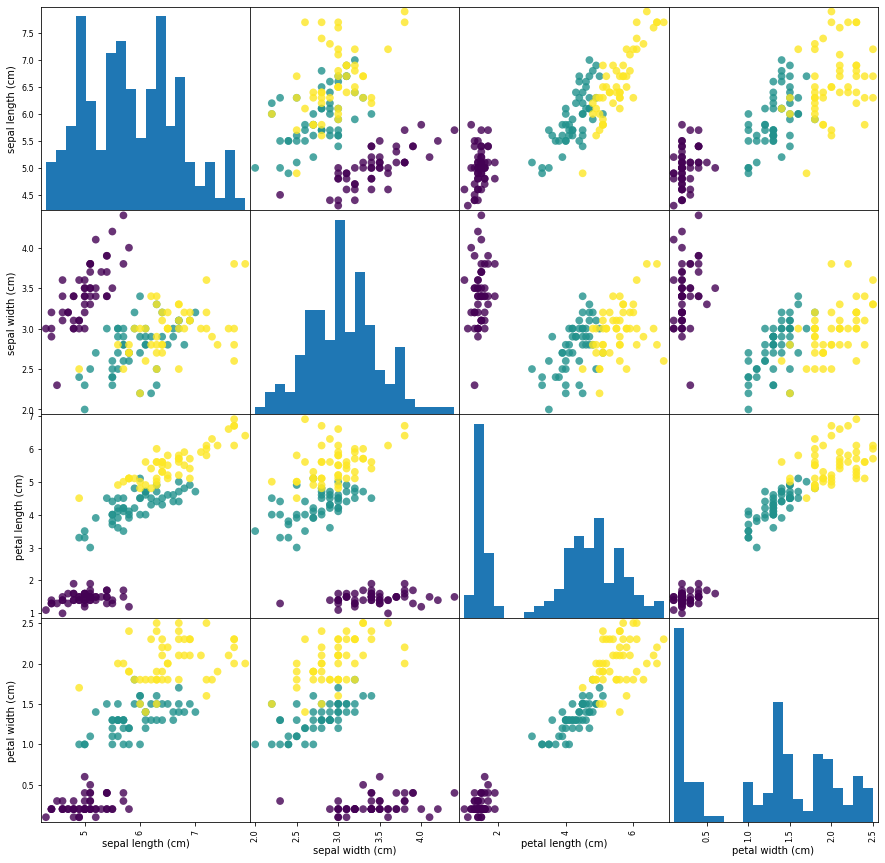

In [34]:
iris_dataframe = pd.DataFrame(x, columns=iris.feature_names)

# 直接调用pandas内置绘图
# https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html

fig_iris = pd.plotting.scatter_matrix(iris_dataframe, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s= 60, alpha=.8, c=y)

## [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)参数解析

**n_neighbors** ： int，optional(default = **5**)
默认情况下kneighbors查询使用的邻居数。就是k-NN的k的值，选取最近的k个点。

**weights** ： str或callable，可选(默认=‘uniform’)
默认是**uniform**，参数可以是uniform、distance，也可以是用户自己定义的函数。uniform是均等的权重，就说所有的邻近点的权重都是相等的。distance是不均等的权重，**距离近的点比距离远的点的影响大**。用户自定义的函数，接收距离的数组，返回一组维数相同的权重。

algorithm ： {‘auto’，‘ball_tree’，‘kd_tree’，‘brute’}，可选
快速k近邻搜索算法，默认参数为auto，可以理解为算法自己决定合适的搜索算法。除此之外，用户也可以自己指定搜索算法ball_tree、kd_tree、brute方法进行搜索，brute是蛮力搜索，也就是线性扫描，当训练集很大时，计算非常耗时。kd_tree，构造kd树存储数据以便对其进行快速检索的树形数据结构，kd树也就是数据结构中的二叉树。以中值切分构造的树，每个结点是一个超矩形，在维数小于20时效率高。ball tree是为了克服kd树高纬失效而发明的，其构造过程是以质心C和半径r分割样本空间，每个节点是一个超球体。

leaf_size ： int，optional(默认值= 30)
默认是**30**，这个是构造的kd树和ball**树**的大小。这个值的设置会影响树构建的速度和搜索速度，同样也影响着存储树所需的内存大小。需要根据问题的性质选择最优的大小。

p ： 整数，可选(默认= **2**)
距离度量公式。在上小结，我们使用**欧氏距离**公式进行距离度量。除此之外，还有其他的度量方法，例如曼哈顿距离。这个参数默认为2，也就是默认使用欧式距离公式进行距离度量。也可以设置为1，使用曼哈顿距离公式进行距离度量。

metric ： 字符串或可调用，默认为’**minkowski**’
用于距离度量，默认度量是minkowski，也就是p=2的欧氏距离(欧几里德度量)。

metric_params ： dict，optional(默认=None)
距离公式的其他关键参数，这个可以不管，使用默认的None即可。

*效率*
n_jobs ： int或None，可选(默认=None)
并行处理设置。默认为1，临近点搜索并行工作数。如果为-1，那么**CPU**的所有cores都用于并行工作。

**警告** 关于最近邻居算法，如果发现两个邻居，邻居k+1和k具有相同距离但不同标签，则结果将取决于训练数据的排序。

## [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)参数解析

estimator:估计方法对象(分类器)

X：数据特征(Features)

y：数据标签(Labels)

soring：调用方法(包括accuracy和mean_squared_error等等)

**cv**：几折交叉验证

n_jobs：同时工作的cpu个数（-1代表全部）

*注意*: 在最新的版本sklearn 0.21中cross_val_score与cross_validate被统一, cross_val_score仅仅为调用cross_validate返回字典的结果. ]

注意[soring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter), cv参数的设定

[cross_val_score中cv=5与cv=KFold(n_splits=5)的区别](https://blog.csdn.net/qq_22592457/article/details/103584053)


这里的StratifiedKFold是啥？cv=StratifiedKFold(n_splits=5)其实就等价于cv=5

## 交叉验证

![kfold](https://p0.meituan.net/dpgroup/0b469389442e9823e0482cb1b54081ba54366.png)

关于cv的值的[设定](https://zhuanlan.zhihu.com/p/31924220):

*2017年的一项研究给出了另一种经验式的选择方法[3], 作者建议k, 近似 log(n), 且保证 n/k > 3d, 此处的n代表了数据量, d代表了特征数.*


In [7]:
# 测试值, 不宜设置过大
k_range = list(range(1, 32))

weight_options = ["uniform", "distance"]

## k值的确定_1 - Error Rate

min error index 12


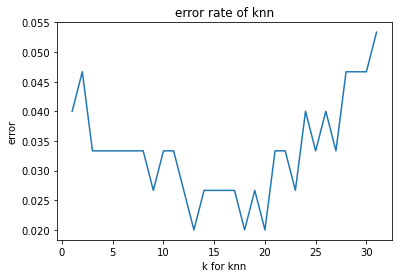

In [27]:
# 获取k值的其中方法_1

k_error = []

for k in k_range:
    # KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, \
    # metric='minkowski', metric_params=None, n_jobs=None)
    knn = KNeighborsClassifier(n_neighbors=k)
        # (estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, \
        # pre_dispatch='2*n_jobs', error_score=nan)
        # cv, cross-validation generator or an iterable,
        # scoring的参数设定, 参见: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    # 关于cv的值, 暂无可靠的源提及如何设置合适的范围, 10 为较多案例使用的参数
    # 注意不同参数对值的影响分非常大
    k_error.append(1 - scores.mean())
            
plt.plot(k_range, k_error)

# 最小值出现的位置
print(f'min error index {np.argmin(k_error)}')

plt.title('error rate of knn')

plt.xlabel('k for knn')

plt.ylabel('error')

plt.show()

## k值的确定_2 - GridSearchCV

In [42]:
# 获取k值的方法_2

from sklearn.model_selection import GridSearchCV

test_knn = KNeighborsClassifier()

p_grid = {
    "n_neighbors": k_range,
    "weights": weight_options
}

gscv = GridSearchCV(test_knn, p_grid, cv = 10, scoring='accuracy')

gscv.fit(x, y)

print (gscv.best_score_)
print (gscv.best_params_)
print (gscv.best_estimator_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=13)


## k值的确定_3 - KFold

In [50]:
# 获取k值的方法_3

# class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)
# n_splits, 默认为5, int >=2
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html?highlight=kfold#sklearn.model_selection.KFold
from sklearn.model_selection import KFold

# random_state, shuffle, 乱序

k_n = 10

kf = KFold(n_splits = k_n, random_state=100, shuffle=True)

s_list = []
stmp_list = []

for k in k_range:
    for t_index, v_index in kf.split(x):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x[t_index], y[t_index])
        stmp_list.append(knn.score(x[v_index], y[v_index]))
        
    s_list.append(np.mean(stmp_list))
    stmp_list.clear()

print(f'best k: {k_range[np.argmax(s_list)]}')   

best k: 18


注意和**meshgrid**之间的区别

用法：返回**多维**结构，常见的如2D图形，3D图形。对比np.meshgrid，在处理大数据时速度更快，且能处理多维（np.meshgrid只能处理**2**维）

![区别](https://p0.meituan.net/dpgroup/cf7191b47886d2bce1a9cee0328b0117211167.png)

In [21]:
# https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html
# 多维数据的生成
np.mgrid[1:4:1, 2:3:1]
# 1:4:1, 生成1-4(不包含)的数据, 步长为1

array([[[1],
        [2],
        [3]],

       [[2],
        [2],
        [2]]])

In [22]:
# https://numpy.org/doc/stable/reference/generated/numpy.c_.html
# Translates slice objects to concatenation along the second axis.
np.c_[np.array([1,2,3]), np.array([4,5,6])]
# 合并两个数组

array([[1, 4],
       [2, 5],
       [3, 6]])

## 测试-绘图

uniform [0 0 0 ... 2 2 2]
uniform 0.8266666666666667
distance [0 0 0 ... 2 2 2]
distance 0.9266666666666666


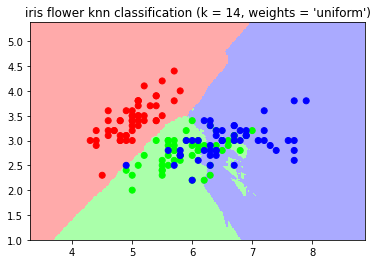

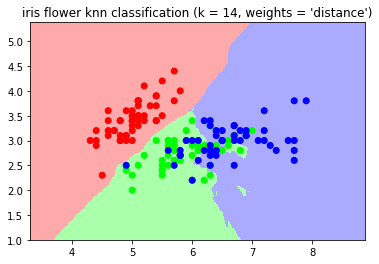

In [8]:
# 此值如上所得 18, 12, 13, mean()
n_neighbors = 14

# 截取其中的两列数据, 绘制2d的图
part_x = iris.data[:, :2]  

# 辅助绘图
h = .02  # 网格中的步长
color_a = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
color_b = ['#FF0000', '#00FF00', '#0000FF']

# class matplotlib.colors.ListedColormap(colors, name='from_list', N=None)
# 设置颜色

cmap_light = ListedColormap(color_a)
cmap_bold = ListedColormap(color_b)

# 绘制边界
# 绘制网格中的点 [x_min, x_max]x[y_min, y_max]
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1


# numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# 生成训练集
# 没有原有的数据集中划分出训练集和测试集, 而是全部使用原有的数据作为训练集, 而生成新的数据, 作为测试集
# test_data = np.c_[8, 2]

#np.ravel, 将矩阵一维化, 即拉平flat
test_data = np.c_[xx.ravel(), yy.ravel()]

# - weights 参数是用于预测的权重函数。可选参数如下:
# - 'uniform' : 统一的权重. 在每一个邻居区域里的点的权重都是一样的。
# - 'distance' : 权重点等于他们距离的倒数。使用此函数，更近的邻居对于所预测的点的影响更大。
# - [callable] : 一个用户自定义的方法，此方法接收一个距离的数组，然后返回一个相同形状并且包含权重的数组。

for weight in weight_options:
    
    knn = KNeighborsClassifier(n_neighbors, weights=weight)
    
    knn.fit(part_x, y)
    
    # 测试结果
    result = knn.predict(test_data)
    
    print(weight, result)
    
    print(weight, knn.score(part_x, y))

    # 将结果放入一个彩色图中
    pic = result.reshape(xx.shape)
    
    # 生成图片
    plt.figure()
    
    plt.pcolormesh(xx, yy, pic, shading='auto', cmap=cmap_light)

    # 绘制训练点
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    
    plt.ylim(yy.min(), yy.max())
    
    plt.title(f"iris flower knn classification (k = {n_neighbors}, weights = '{weight}')")

plt.show()

In [8]:
xx

array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

In [11]:
xx.ravel().shape

(61600,)

In [10]:
xx.shape

(220, 280)

In [9]:
# 测试集
test_data

array([[3.3 , 1.  ],
       [3.32, 1.  ],
       [3.34, 1.  ],
       ...,
       [8.84, 5.38],
       [8.86, 5.38],
       [8.88, 5.38]])

## 单一数据集测试

In [28]:
# 传入全部4个参数, 作为测试
# [5, 3.4, 1.5, 0.2], 此数据为原数据集中随机抽取Iris-setosa的一个值进行细微的修改
# 需要传入的是一个二维数据, 先将矩阵转为二维.reshape(1, -1)
new_test_data = np.array([5.2, 3.3, 1.2, 0.2]).reshape(1, -1)
new_test_data

array([[5.2, 3.3, 1.2, 0.2]])

In [29]:
new_knn = KNeighborsClassifier(n_neighbors, weights=weight_options[1])
new_knn.fit(x, y)
new_result = new_knn.predict(new_test_data)
new_result

array([0])

In [30]:
# 预测得到的花名称
iris_names[new_result][0]

'setosa'

## 本次训练主要涉及到的库

1. sklearn
2. numpy
3. matplotlib

## 主要涉及概念

1. 数据的处理
2. knn近邻算法
3. 交叉验证 